In [3]:
import pandas as pd

df = pd.read_csv('/content/df_churn_yes_cleaned.csv')
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1672,8837-VVWLQ,1,Female,0,0,0,8,1,0,Fiber optic,...,0,0,1,0,Month-to-month,0,Electronic check,84.95,668.40,2.831667
1061,5458-CQJTA,1,Male,0,1,1,65,1,0,DSL,...,0,1,1,1,Two year,1,Bank transfer (automatic),74.80,4820.15,2.493333
890,4636-QRJKY,1,Female,0,1,1,6,1,1,Fiber optic,...,0,1,0,0,Month-to-month,1,Electronic check,80.50,502.85,2.683333
72,0390-DCFDQ,1,Female,1,1,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.45,70.45,2.348333
1125,5813-UECBU,1,Male,1,0,0,33,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Credit card (automatic),83.85,2716.30,2.795000


In [5]:
df.drop('customerID', axis=1, inplace=True)
df.drop('Cuentas_Diarias', axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

Se elimina:

customerID, porque solo es un identificador; no muestra ningun patron que aporte al modelo.

Cuentas_Diarias, porque es un calculo simple de la columna Charges.Monthly.

In [6]:
df.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
721,1,Male,0,0,0,7,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,99.80,673.25
1507,1,Female,0,0,1,2,1,0,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,19.60,35.85
999,1,Male,0,0,0,1,1,0,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Electronic check,19.95,19.95
1766,1,Female,0,1,1,1,1,0,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Electronic check,74.70,74.70
425,1,Male,0,1,0,9,1,0,Fiber optic,0,1,1,1,1,0,Month-to-month,1,Mailed check,94.85,890.60


# Encoding

In [12]:
columnas_categoricas = df.select_dtypes(include=['object']).columns
df_codificado = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

df.head()
df_codificado.head()
df_codificado.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_1', 'OnlineSecurity_No internet service',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_1', 'DeviceProtection_No internet service',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:

# Calculate the proportion of each class in the 'Churn' column.
churn_proporciones = df['Churn'].value_counts(normalize=True)

# Print the results.
print("Proporción de clientes que cancelaron (Churn=1) y que no cancelaron (Churn=0):\n")
print(churn_proporciones)

# Evaluate class imbalance, handling the case where only one class exists.
if 0 in churn_proporciones:
    churn_ratio = churn_proporciones[1] / churn_proporciones[0]
    print("\nRatio de clientes que cancelaron a clientes que no cancelaron:")
    print(f"{churn_ratio:.2f}")

    if churn_ratio > 1.5:
        print("\n⚠️ Existe un desbalance significativo entre las clases. Esto puede afectar los modelos predictivos.")
    else:
        print("\n✅ El desbalance entre las clases no es significativo.")
else:
    print("\n⚠️ El archivo contiene datos de clientes que solo han cancelado (Churn=1), por lo que no es posible evaluar el desbalance de clases.")


Proporción de clientes que cancelaron (Churn=1) y que no cancelaron (Churn=0):

Churn
1    1.0
Name: proportion, dtype: float64

⚠️ El archivo contiene datos de clientes que solo han cancelado (Churn=1), por lo que no es posible evaluar el desbalance de clases.


#🎯 Correlación y Selección de Variables

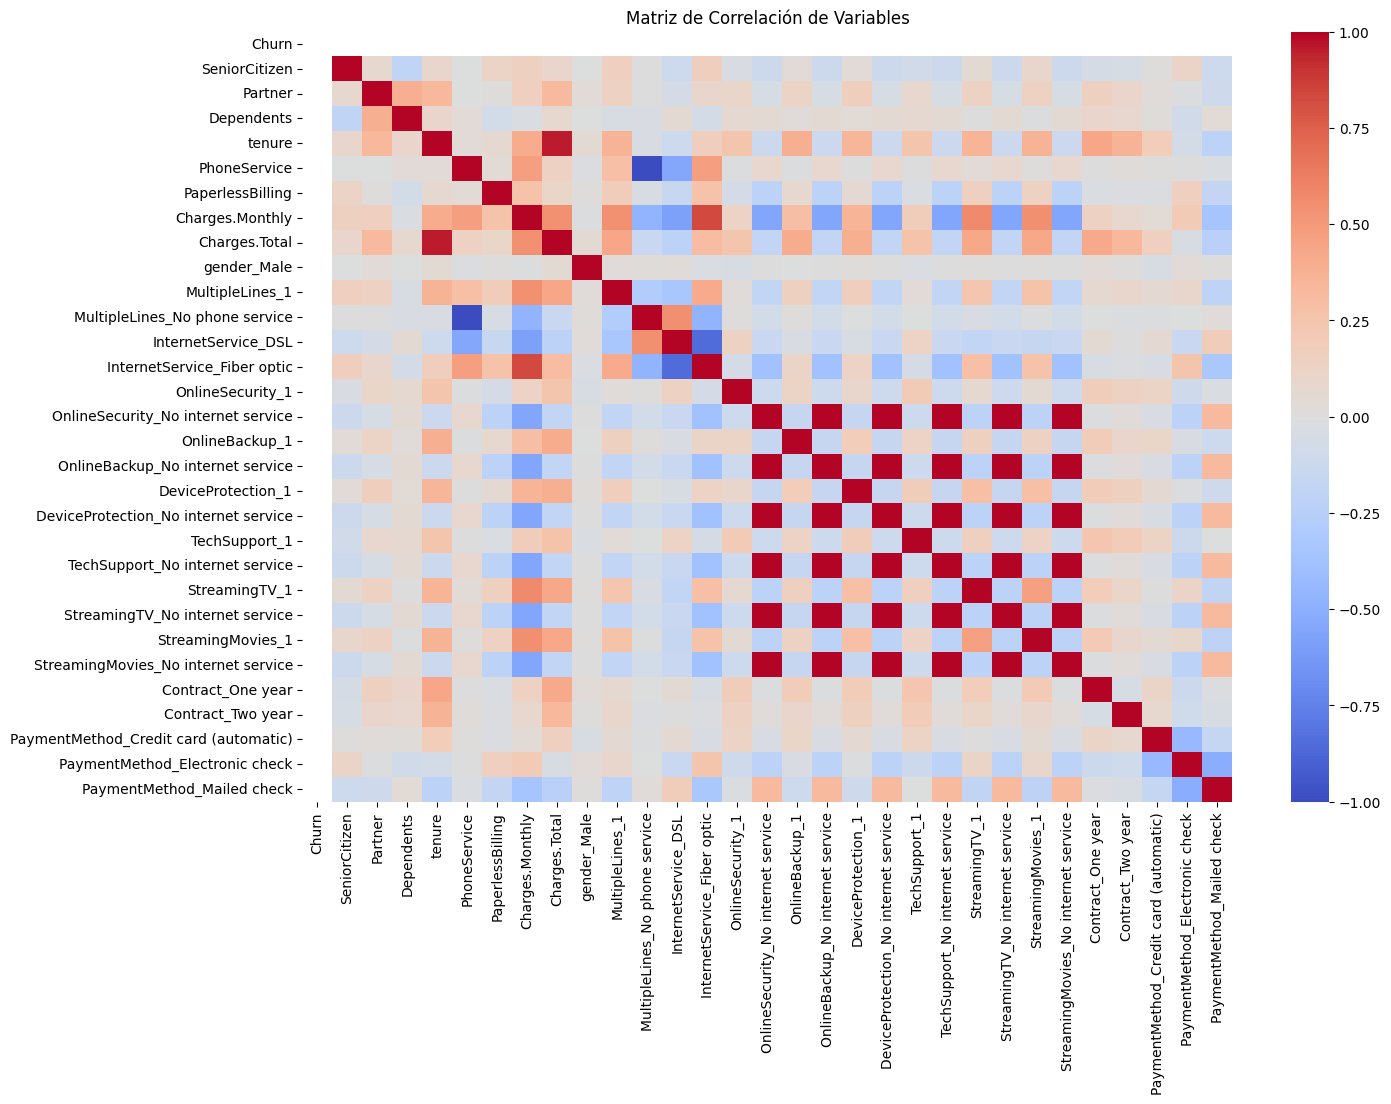

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_codificado.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables')
plt.show()

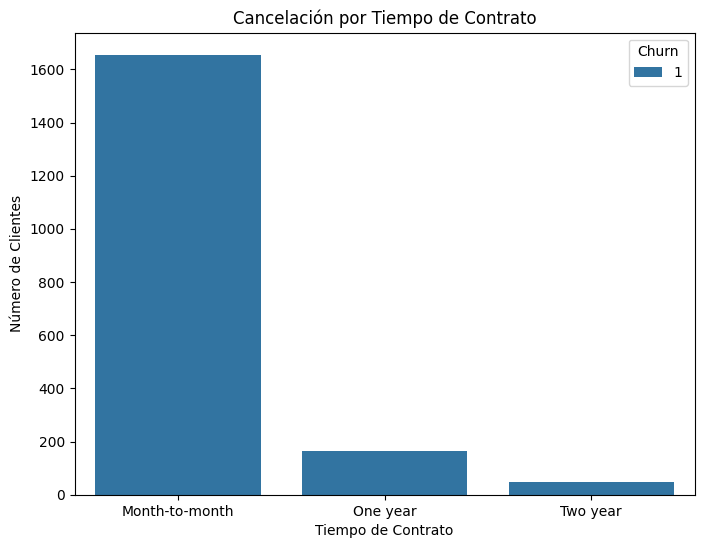

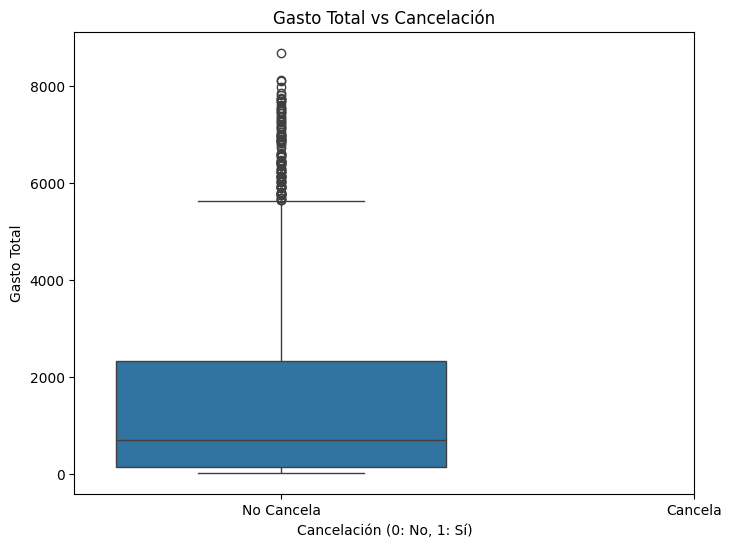

In [15]:
# Visualize the relationship between 'Contract' and 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Cancelación por Tiempo de Contrato')
plt.xlabel('Tiempo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Visualize the relationship between 'Charges.Total' and 'Churn' using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Charges.Total')
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.xticks([0, 1], ['No Cancela', 'Cancela'])
plt.show()

#🤖 Modelado Predictivo

In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'Churn' is your target variable
x = df_codificado.drop('Churn', axis=1)
y = df_codificado['Churn']

# Split the data into training and testing sets (80% train, 20% test)
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento (x_entrenamiento, y_prueba):", x_entrenamiento.shape, y_entrenamiento.shape)
print("Conjunto de prueba (x_prueba, y_prueba):", x_prueba.shape, y_prueba.shape)

Conjunto de entrenamiento (x_entrenamiento, y_prueba): (1495, 30) (1495,)
Conjunto de prueba (x_prueba, y_prueba): (374, 30) (374,)


# Task
Entrena al menos dos modelos diferentes para predecir la cancelación de clientes, uno que requiera normalización (como Regresión Logística o KNN) y otro que no (como Árbol de Decisión o Random Forest). Evalúa y compara su rendimiento.

## Normalizar los datos (para modelos que lo requieran)

### Subtask:
Aplicar normalización a las características numéricas del conjunto de entrenamiento y prueba para los modelos sensibles a la escala de los datos.


**Reasoning**:
Import the StandardScaler and identify numerical columns to prepare for normalization.



In [22]:
from sklearn.preprocessing import StandardScaler

columnas_numericas = x_entrenamiento.select_dtypes(include=['number']).columns

**Reasoning**:
Instantiate and fit the StandardScaler to the training data and transform both the training and testing data.



In [23]:
scaler = StandardScaler()

x_entrenamiento_normalizado = scaler.fit_transform(x_entrenamiento[columnas_numericas])
x_prueba_normalizado = scaler.transform(x_prueba[columnas_numericas])

x_entrenamiento[columnas_numericas] = x_entrenamiento_normalizado
x_prueba[columnas_numericas] = x_prueba_normalizado

## Seleccionar modelos

### Subtask:
Elegir al menos un modelo que requiera normalización (como Regresión Logística o KNN) y al menos un modelo que no la requiera (como Árbol de Decisión o Random Forest).


**Reasoning**:
Identify the models to be used for prediction, one requiring normalization and one not.



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Models that require normalization
model_normalized = LogisticRegression()

# Models that do not require normalization
model_not_normalized = DecisionTreeClassifier()

print("Model that requires normalization:", type(model_normalized).__name__)
print("Model that does not require normalization:", type(model_not_normalized).__name__)

Model that requires normalization: LogisticRegression
Model that does not require normalization: DecisionTreeClassifier


## Entrenar modelos

### Subtask:
Entrenar cada modelo seleccionado utilizando los datos de entrenamiento (normalizados o no, según corresponda).


In [25]:
model_normalized.fit(x_entrenamiento, y_entrenamiento)
model_not_normalized.fit(x_entrenamiento, y_entrenamiento)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

## Entrenar modelos retry 1

### Subtask:
Entrenar cada modelo seleccionado utilizando los datos de entrenamiento (normalizados o no, según corresponda).


In [26]:
model_normalized.fit(x_entrenamiento, y_entrenamiento)
model_not_normalized.fit(x_entrenamiento, y_entrenamiento)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

hay que arreglar el conjunto de datos para que incluya las dos categorías de clientes. Una vez hecho esto, podremos entrenar, evaluar y comparar el rendimiento de los modelos sin problema.

# 📋 Interpretación y Conclusiones

Los modelos no pudieron entrenarse porque el conjunto de datos solo contiene una clase en la variable objetivo.